# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer

# Data Importing

In [2]:
mushroom = pd.read_csv('Mushroom_classification/mushrooms.csv')

# Exploring the dataset

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom.shape

(8124, 23)

In [5]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushroom_grouped = mushroom.groupby(['class'])
mushroom_grouped.get_group('p')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d


In [8]:
mushroom_grouped.get_group('e')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l


# Handling missing values

In [6]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Data visualization

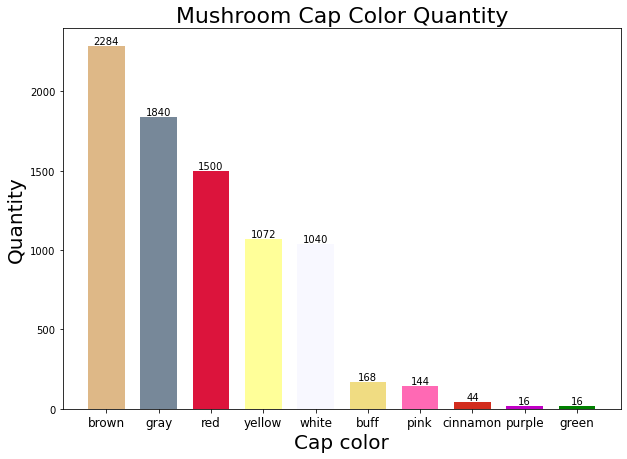

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

cap_colors = mushroom['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes 

colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
width = 0.7
x = np.arange(len(m_height))
ind = np.arange(10) 

mushroom_bars = ax.bar(x, m_height, width, color=colors )
ax.set_xlabel('Cap color', fontsize=20)
ax.set_ylabel('Quantity', fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1*height, '%d' % int(height),
                    ha='center', va='bottom')


autolabel(mushroom_bars)

'Following bar chart shows the # of mushrooms which are edible or poisonous based on cap-color'

In [8]:
cap_colors

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [9]:
cap_color_labels = cap_colors.axes[0].tolist()
cap_color_labels

['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']

In [10]:
poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(mushroom[mushroom['cap-color'] == capColor].index)
    edibles = len(mushroom[(mushroom['cap-color'] ==capColor) & (mushroom['class']=='e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
    
    
print(poisonous_cc)
print(edible_cc)


[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]
[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]


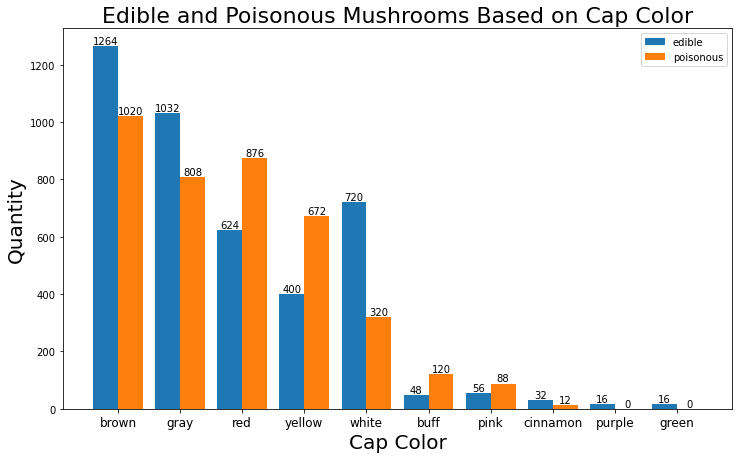

In [11]:
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc, width)
poison_bars = ax.bar(ind+width, poisonous_cc, width)
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.legend((edible_bars,poison_bars),('edible','poisonous'))

ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

autolabel(edible_bars)
autolabel(poison_bars)

'The next bar chart shows the number of mushrooms based on "odor"'

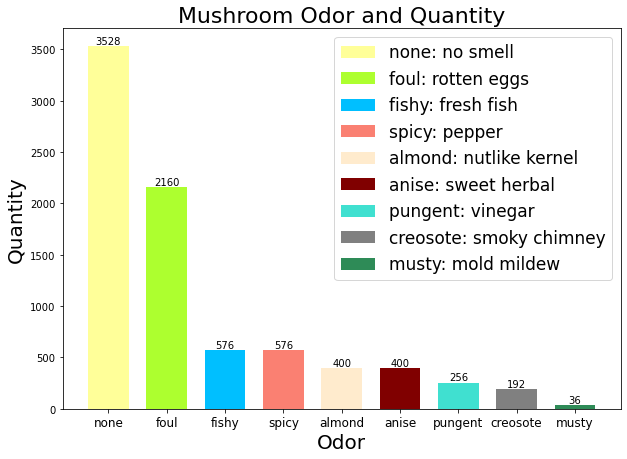

In [12]:
odors = mushroom['odor'].value_counts()
odor_height = odors.values.tolist()
ind = np.arange(9)

width = 0.7 
ind = np.arange(9)
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odors_bars = ax.bar(ind, odor_height, width, color=colors)

ax.set_xlabel('Odor', fontsize=20)
ax.set_ylabel('Quantity', fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odors_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odors_bars)        
plt.show()

'Following bar: # of mushrooms which are edible|poisonous based on odor'

In [13]:
type(odors.axes[0])

pandas.core.indexes.base.Index

In [14]:
odor_lab = odors.axes[0].tolist()
odor_lab

['n', 'f', 's', 'y', 'l', 'a', 'p', 'c', 'm']

In [15]:
poisonous_od = []
edible_od = []
odor_lab = odors.axes[0].tolist()

for odor in odor_lab:
    size = len(mushroom[mushroom['odor'] == odor].index)
    edibles = len(mushroom[(mushroom['odor'] == odor) & (mushroom['class']=='e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
    
    
print(poisonous_od)
print(edible_od)

[120, 2160, 576, 576, 0, 0, 256, 192, 36]
[3408, 0, 0, 0, 400, 400, 0, 0, 0]


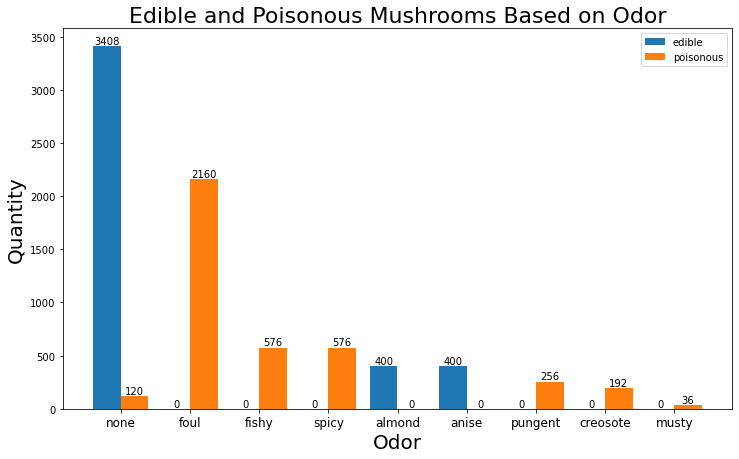

In [19]:
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_odor_bars = ax.bar(ind, edible_od, width)
poison_odor_bars = ax.bar(ind+width, poisonous_od, width)
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.legend((edible_odor_bars,poison_odor_bars),('edible','poisonous'))

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)

autolabel(edible_odor_bars)
autolabel(poison_odor_bars)
plt.show()

'Pie Chart: Show the type of mushroom population.'

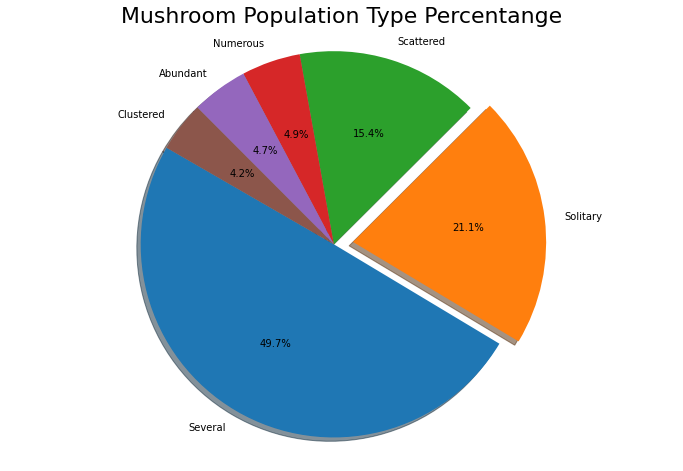

In [16]:
populations = mushroom['population'].value_counts()
pop_size = populations.values.tolist()
pop_types = populations.axes[0].tolist()

pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']

explode = (0, 0.1, 0, 0, 0, 0)
fig = plt.figure(figsize=(12,8))
plt.title('Mushroom Population Type Percentange', fontsize=22)

plt.pie(pop_size, explode=explode, labels=pop_labels, autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.axis('equal')

plt.show()

In [17]:
print(populations)
print(pop_types)

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64
['v', 'y', 's', 'n', 'a', 'c']


In [18]:
filt = mushroom['class'] == 'p'
mushroom.loc[filt]['population'].value_counts()

v    2848
y     648
s     368
c      52
Name: population, dtype: int64

'Double Pie Chart: Show edibles and poisonous percentages of mushrrom population types.'

In [19]:
poisonous_pop = []
edible_pop = []

for population in pop_types:
    size = len(mushroom[mushroom['population'] == population].index)
    edibles = len(mushroom[(mushroom['population'] == population) & (mushroom['class']=='e')].index)
    edible_pop.append(edibles)
    poisonous_pop.append(size-edibles)

combine_ed_poi = []
for i in range(0,len(edible_pop)):
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])
    

print(combine_ed_poi)
print(populations)

[1192, 2848, 1064, 648, 880, 368, 400, 0, 384, 0, 288, 52]
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64


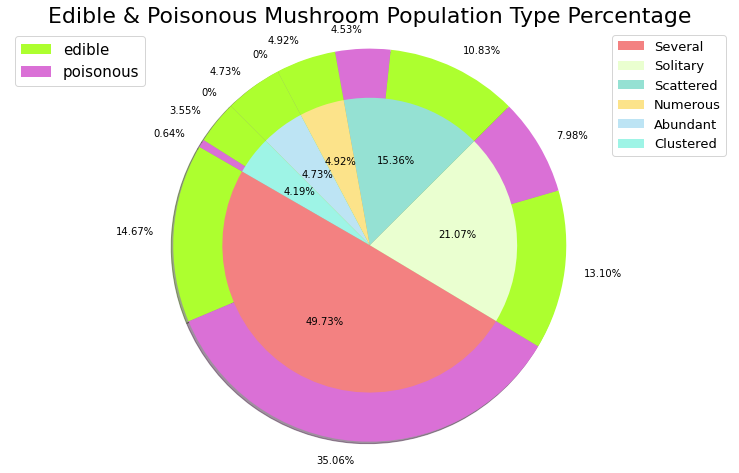

In [38]:
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Population Type Percentage', fontsize=22)
explode = (0, 0.1, 0, 0, 0, 0) 
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%']


patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)


patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)



first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)

plt.gca().add_artist(first_legend)

plt.axis('equal')
plt.show()

We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data.

# Feature engineering

In [21]:
label_binarizer = LabelBinarizer()
for col in mushroom.columns:
    mushroom[col] = label_binarizer.fit_transform(mushroom[col])

    
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
print(mushroom.groupby('class').size())

class
0    4208
1    3916
dtype: int64


In [23]:
correlation = mushroom.corr()
correlation

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.182567,-0.195415,0.067544,-0.501530,-0.219529,0.129200,-0.348387,0.540024,0.538808,...,-0.136782,0.245662,0.245662,NaN,-0.105491,0.069159,0.223286,-0.074371,-0.214871,-0.126123
cap-shape,-0.182567,1.000000,-0.091638,0.010011,0.115686,0.262455,-0.122896,0.039406,-0.148449,-0.126163,...,-0.068543,-0.057522,-0.057522,NaN,0.092724,-0.016194,-0.163553,0.065370,-0.054064,-0.182037
cap-surface,-0.195415,-0.091638,1.000000,-0.091873,-0.028808,-0.113647,0.102989,0.202414,-0.257889,-0.328623,...,0.034027,0.112503,0.112503,NaN,-0.069137,-0.042180,-0.211881,-0.048742,0.105739,0.190756
cap-color,0.067544,0.010011,-0.091873,1.000000,0.172330,-0.033069,0.023671,-0.063773,-0.097221,-0.075531,...,0.117713,-0.034437,-0.034437,NaN,-0.015891,-0.009695,-0.017154,-0.011203,-0.032367,-0.115580
bruises,-0.501530,0.115686,-0.028808,0.172330,1.000000,0.269875,0.137359,-0.299473,-0.369596,-0.438292,...,-0.100598,-0.199833,-0.199833,NaN,-0.092210,-0.056257,-0.506406,-0.065008,-0.187820,0.264457
odor,-0.219529,0.262455,-0.113647,-0.033069,0.269875,1.000000,0.037070,-0.025662,-0.093164,-0.118284,...,-0.064263,-0.053930,-0.053930,NaN,-0.024885,-0.015182,-0.163954,-0.017544,-0.050688,-0.124950
gill-attachment,0.129200,-0.122896,0.102989,0.023671,0.137359,0.037070,1.000000,0.071489,0.108984,0.084670,...,0.046001,0.038604,0.038604,NaN,-0.671306,-0.199347,0.117362,-0.473272,0.036283,0.100905
gill-spacing,-0.348387,0.039406,0.202414,-0.063773,-0.299473,-0.025662,0.071489,1.000000,-0.108333,-0.228112,...,0.397895,-0.104004,-0.104004,NaN,-0.047991,-0.029279,0.264962,-0.033834,0.507534,-0.217237
gill-size,0.540024,-0.148449,-0.257889,-0.097221,-0.369596,-0.093164,0.108984,-0.108333,1.000000,0.776903,...,-0.115609,-0.158553,-0.158553,NaN,-0.073162,-0.044636,0.537772,-0.051579,-0.149021,-0.016064
gill-color,0.538808,-0.126163,-0.328623,-0.075531,-0.438292,-0.118284,0.084670,-0.228112,0.776903,1.000000,...,-0.146781,-0.123180,-0.123180,NaN,-0.056839,-0.034678,0.721446,-0.040072,-0.115774,-0.057785


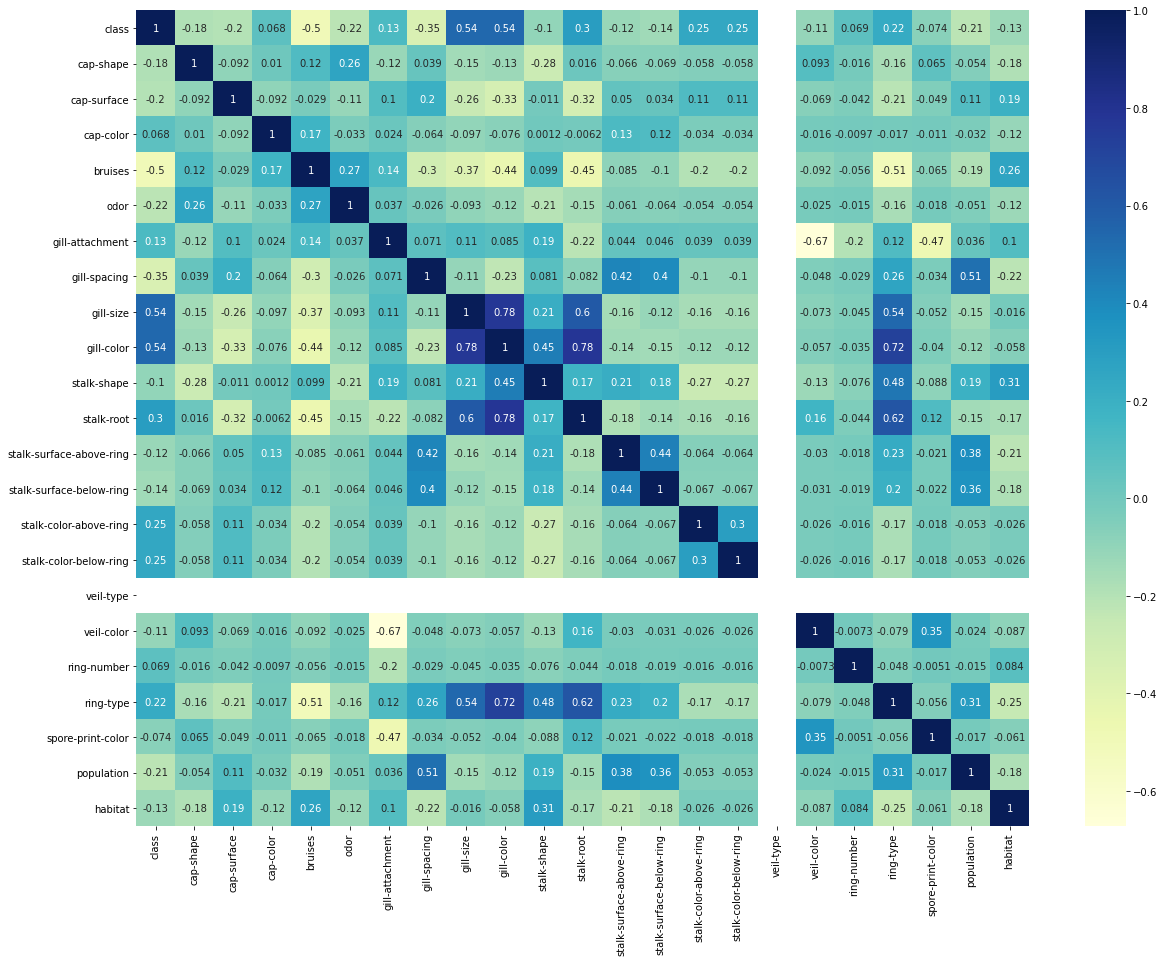

In [24]:
f, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")

Attributes which have strong positive correlation with classes (coef>0,5) are: gill size and color (Pearson coefficient=0.54).
Attributes with weak positive correlation(0<coef<0.5 ): cap color, gill attachment, stalk root, stalk color above ring, stalk color below ring, ring number, ring type.
Attributes with strong negative correlation(-1<coef<-0.5 ): bruises.
Attributes with weak negative correlation(-0,5<coef<0 ):cap shape, cap surface, odor, gill spacing, stalk shape, stalk surface above ring, stalk surface below ring, veil color, spore print color, population, habitat.

# Prepare dataset for training

In [28]:
X = mushroom.iloc[:,1:23]
y = mushroom.iloc[:, 0]
X.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [29]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.285574,0.020679,0.415559,0.049237,0.974151,0.161497,0.309207,0.212703,0.567208,...,0.073855,0.053176,0.053176,0.0,0.011817,0.004431,0.341704,0.005908,0.047267,0.387494
std,0.229235,0.451715,0.142318,0.492848,0.216375,0.158695,0.368011,0.462195,0.409245,0.495493,...,0.261551,0.224398,0.224398,0.0,0.108068,0.066425,0.474310,0.076644,0.212223,0.487208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X.shape[0]

8124

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision tree without tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc_no_tuning = DecisionTreeClassifier(random_state=42)

dtc_no_tuning.fit(X_train, y_train)

y_pred = dtc_no_tuning.predict(X_test)

# Metrics and accuracy

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       0.99      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [34]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9922067268252666


In [35]:
from sklearn.model_selection import cross_val_predict

y_probas_tree = cross_val_predict(dtc_no_tuning, X_train, y_train, cv=3, method="predict_proba")
y_probas_tree[:,1]

array([1.        , 0.        , 1.        , ..., 0.09836066, 1.        ,
       0.        ])

In [36]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_scores_tree = y_probas_tree[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train, y_scores_tree)

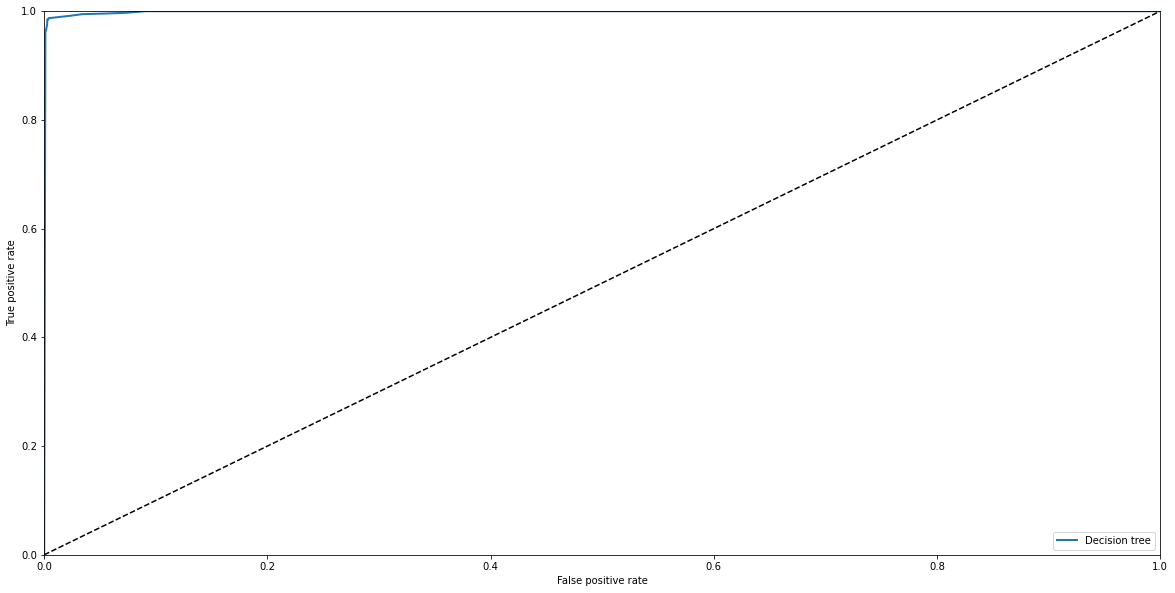

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(20,10)) 
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.legend(loc="lower right")
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
    
plot_roc_curve(fpr_tree, tpr_tree, "Decision tree")
plt.legend(loc="lower right")
plt.show()

In [38]:
roc_auc_score(y_train, y_scores_tree)

0.9989020547058381

Here comes a very interesting discussion: differences between accuracy score and ROC AUC Score. As accuracy is calculated on the predicted classes while ROC AUC on predicted scores. Accuracy is a good choice for balanced problems because it is simple and easy to interpret. But when problem is imbalanced we can get a high accuracy score by predicting that all observations belong to the majority class. Our problem is balanced so we can see that there is no big difference between accuracy score and ROC AUC score.

Now let's generate learning curve for training and validation set to see if classifier is not overfitting.

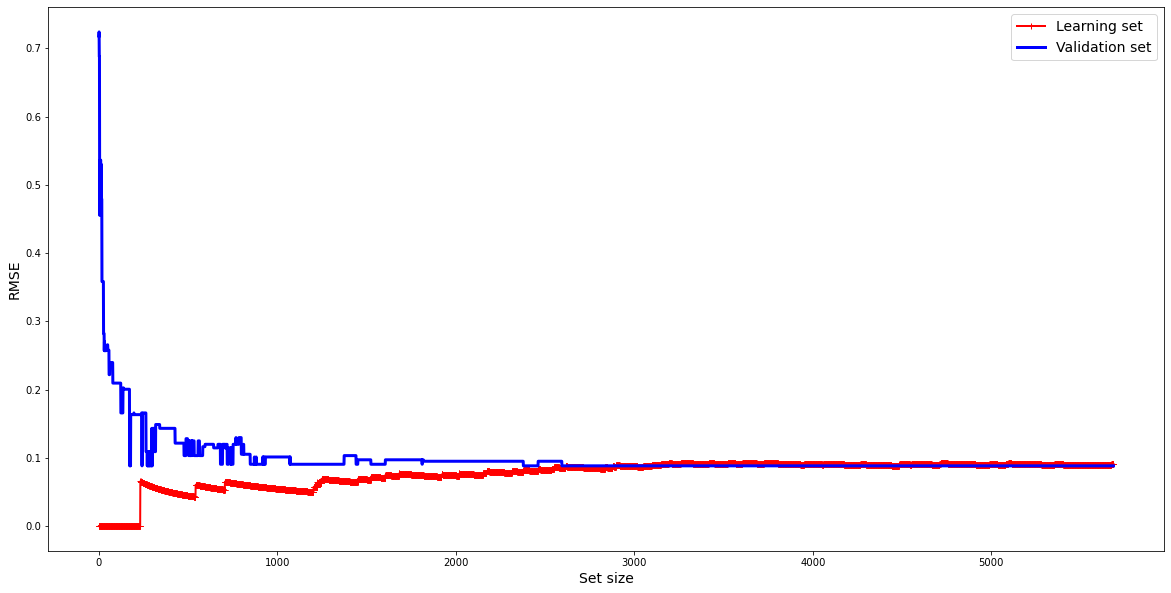

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_test))
        
    plt.figure(figsize=(20,10))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Learning set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
             
plot_learning_curves(dtc_no_tuning, X, y)

# Hyperparameter tuning

In [52]:
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = [2, 3, 4]


random_grid = {'min_samples_split': min_samples_split,
               'min_samples_leaf':min_samples_leaf,
                'max_features': max_features}

print(random_grid)

{'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': [2, 3, 4]}


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit


decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_search_cv = RandomizedSearchCV(estimator= decision_tree_classifier, param_distributions = random_grid, cv=ShuffleSplit(n_splits = 20, test_size=.3,random_state=1), verbose=1)

random_search_cv.fit(X_train, y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


RandomizedSearchCV(cv=ShuffleSplit(n_splits=20, random_state=1, test_size=0.3, train_size=None),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='dep

In [54]:
random_search_cv.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 2}

In [55]:
random_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [56]:
final_model = random_search_cv.best_estimator_
y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       0.99      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [57]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9922067268252666


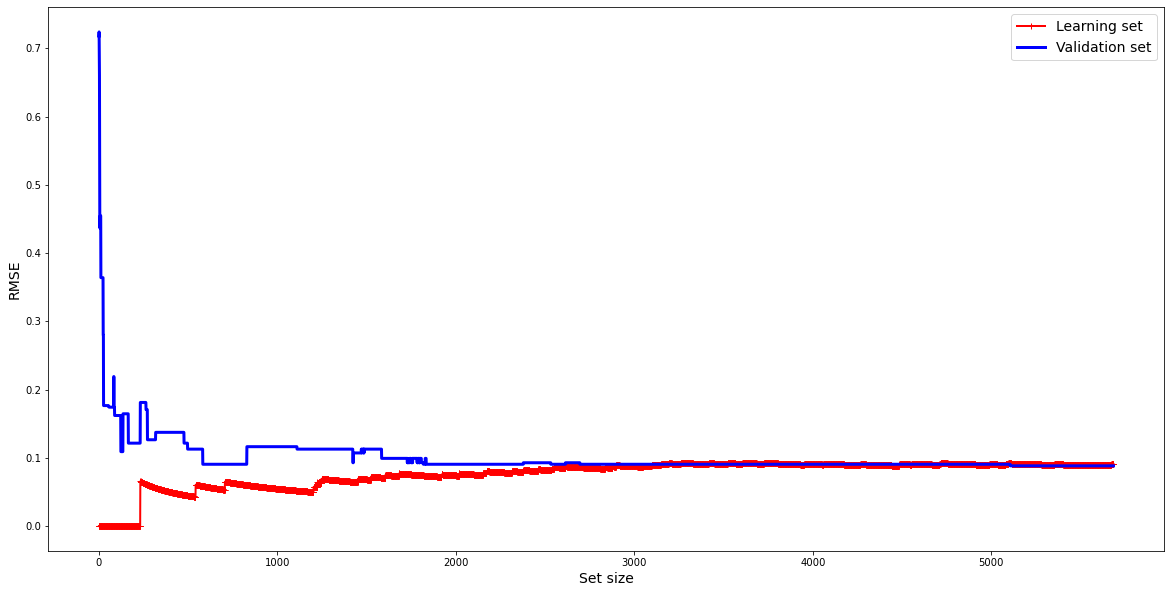

In [58]:
plot_learning_curves(final_model, X, y)

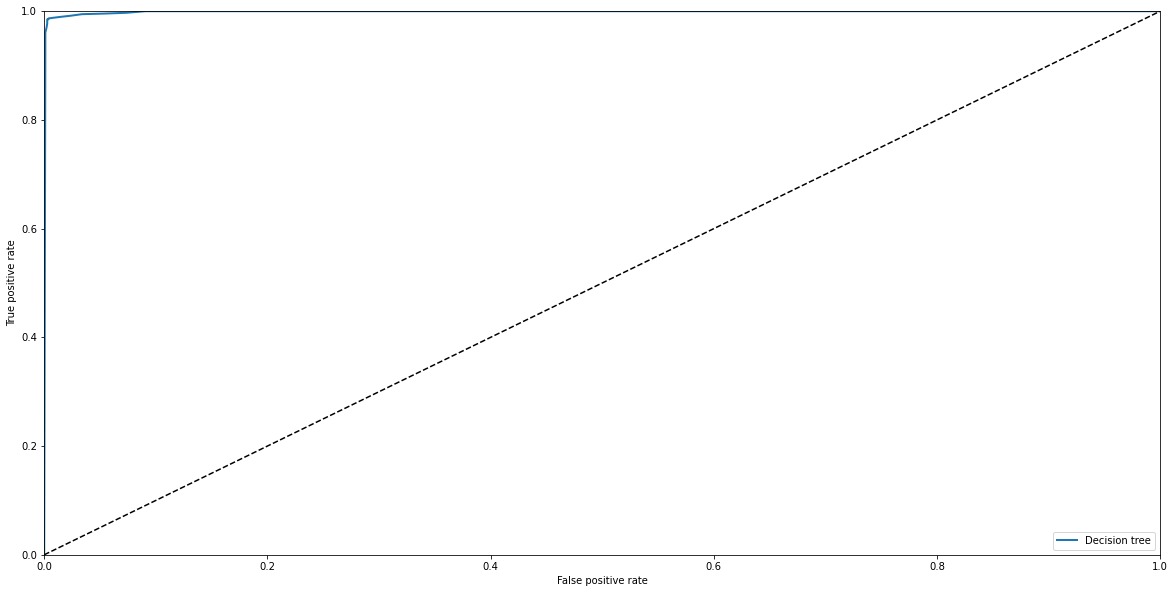

In [59]:
y_probas_tree = cross_val_predict(final_model, X_train, y_train, cv=3, method="predict_proba")

y_scores_tree_tunned = y_probas_tree[:, 1]
fpr_tree_tun, tpr_tree_tun, thresholds_tree_tun = roc_curve(y_train, y_scores_tree_tunned)

    
plot_roc_curve(fpr_tree_tun, tpr_tree_tun, "Decision tree")
plt.legend(loc="lower right")
plt.show()

Comment: with such clean and  easy data hypertunning makes no difference - only complicates a model... :)